In [475]:
import numpy as np
from parse import write_input_file, read_input_file
import networkx as nx


In [476]:
# def generate2(M):
#     for v in len(M):
        
#         a = list(range(0,p)) + list(range(p+1, V))
#         rnds = np.random.choice(a, 2, replace = False)
#         rt1 = str(p) + " " + str(rnds[0]) + " " + str(round(np.random.uniform(0,1),3)) + "\n"
#         rt2 = str(p) + " " + str(rnds[1]) + " " + str(round(np.random.uniform(0,1),3)) + "\n"
#     return rt1+rt2
    
# def create_graph(V):
#     M = np.zeros((V,V))
#     data = str(V)+"\n"
#     for v in range(V):
#         indxs = np.where(M[v] != 1)
#         msk = np.random.choice(indxs[0], int(0.85*len(M[v])), replace = False)
#         M[v][msk] = 1
    
#     utl = np.tril_indices(V, -1)
#     M[utl] = 0
#     checker = {}
#     uti = np.tril_indices(V, 1)
#     for row in range( V):
#         for col in range(row+1, V):
#             if M[row][col] : 
#                 M[col][row] = 1
                
#                 checker[col] = checker [col] + 1 if col in checker else 1
#                 checker[row] = checker [row] + 1 if row in checker else 1
#                 weight = np.random.uniform(0, 100)
#                 data += str(row)+ " "+ str(col) + " " + str(round(weight, 2)) + "\n"
                
#     for x in range(V):
#         if x not in checker or checker[x] < 2 :
#             return None, None
            
#     return M, data

In [477]:
def generate_rnd_edges(n, portion):
   
    # upper triangular indicies with diagonal offset 1 (diagonal elements are not included)
    iu1 = np.triu_indices(n, 1)
    
    # choose randomly number of portion of the possible edges
    msk = np.random.choice(len(iu1[0]), int(portion*len(iu1[0])), replace = False)
    
    masked = (iu1[0][msk], iu1[1][msk])
    a = np.zeros((n,n))
    
    # trigger the randomly chosen edges
    a[masked] = 1
    
    indicies = np.where(a>0)
    
    # mirror upper triangle to lower
    a[(masked[1], masked[0])] = 1
    
    assert(np.array_equal (a, a.T))
    print(a)
    # check if any of the nodes have degree less than 2
    indcs = np.where (np.sum(a, axis = 0) < 2)
    if len(indcs[0]) :
        print("These nodes have degree less than two! : ", indcs)
        
    edges = list(zip(indicies[0],indicies[1]))
    for i in range(len(edges)) :
        weight = round(np.random.uniform(0.001, 99.999, ), 3)
        edges[i] = (edges[i][0], edges[i][1], {'weight' : weight})
        
    return edges


In [478]:
thirty = generate_rnd_edges(30, 0.85)
fifty = generate_rnd_edges(50, 0.85)
hundred = generate_rnd_edges(100, 0.85)

G = nx.Graph()
G.add_edges_from(thirty)
path1 = "30.in"
write_input_file(G, path1)

G.clear()
G.add_edges_from(fifty)
path2 = "50.in"
write_input_file(G, path2)

G.clear()
G.add_edges_from(hundred)
path3 = "100.in"
write_input_file(G, path3)


[[0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 0. 0. 0.
  1. 1. 1. 1. 1. 1.]
 [1. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
  1. 1. 1. 1. 1. 1.]
 [1. 0. 0. 0. 1. 1. 1. 1. 1. 0. 1. 0. 1. 1. 0. 0. 1. 1. 1. 1. 1. 1. 0. 1.
  1. 1. 0. 1. 1. 1.]
 [1. 1. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 0. 0. 1. 1. 1. 1.
  1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1.
  1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 0. 1. 1. 1.
  1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1.
  0. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 0. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 0.
  1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 0. 0. 1. 1. 1. 1. 1. 1. 0.
  1. 1. 0. 1. 1. 0.]
 [1. 1. 0. 1. 1. 1. 1. 1. 1. 0. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
  1. 1. 1. 0. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 0. 1. 1. 1. 0. 1. 

In [479]:
read_input_file(path1)
read_input_file(path2)
read_input_file(path3)

In [480]:
ZZ = generate_rnd_edges(100, 0.55)

[[0. 1. 1. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 1. 1.]
 ...
 [0. 0. 0. ... 0. 1. 1.]
 [0. 0. 1. ... 1. 0. 0.]
 [0. 0. 1. ... 1. 0. 0.]]


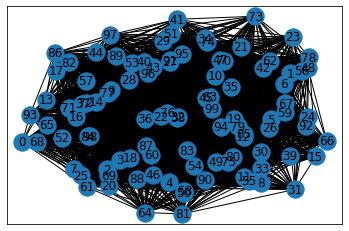

In [481]:
G.clear()
G.add_edges_from(ZZ)
nx.draw_networkx(G)

In [482]:
aaa = nx.shortest_simple_paths(G, 0, 4, weight = "weight")
k = 3
bests = []
un = []
for i, path in enumerate(map(nx.utils.pairwise, aaa)):
    if  i == k:
        break
    zz = list(path)
    bests.append(zz)
    un += zz
print(bests)

[[(0, 39), (39, 28), (28, 57), (57, 4)], [(0, 90), (90, 57), (57, 4)], [(0, 73), (73, 54), (54, 71), (71, 57), (57, 4)]]


In [483]:
edges = G.nodes()
G.add_edge(0,4,weight = 122)
# for e in G.edges(0):
#     G[e[0]][e[1]]["weight"] = 99
# G.edges(0, data = True)
paths = nx.all_simple_paths(G, 0, 3)
the_nodes = np.array([])
the_edges = []
for path in map(nx.utils.pairwise, paths):
    xx = list(path)
    the_edges += xx
    the_set = np.concatenate((the_set, xx)) if the_set.size else np.array(xx)
#     print(xx)
# np.unique(the_set)
set(the_edges)
# list(nx.all_shortest_paths(G, 0, 4))

KeyboardInterrupt: 

In [ ]:

nx.adjacency_matrix(G).todense()

In [ ]:
the_edges

In [ ]:
from mip import Model, xsum, maximize, BINARY

In [ ]:
aa = set()
b = [1,2,2,3]
aa |= set(b)
aa

In [ ]:
the_edges= np.unique(un, axis = 0)
# the_edges = tuple(map(tuple, the_edges))
# the_edges.array_equal(bests[0][0])
# np.array_equal(bests[0][0], the_edges[0])


In [ ]:

cc = bests[0][0]
np.where(np.all(the_edges == cc, axis = 1))


In [ ]:
float('inf') * 5 == np.inf

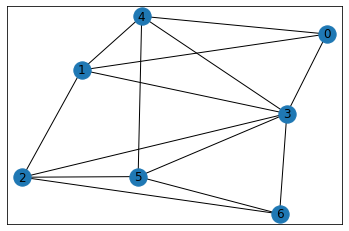

In [484]:
G.clear()

G.add_edge(0, 1, weight = 2)
G.add_edge(0, 3, weight = 9)
G.add_edge(0, 4, weight = 3)
G.add_edge(1, 2, weight = 4)
G.add_edge(2, 3, weight = 1)
G.add_edge(1, 3, weight = 3)
G.add_edge(1, 4, weight = 8)
G.add_edge(2, 5, weight = 9)
G.add_edge(2, 6, weight = 2)
G.add_edge(3, 4, weight = 1)
G.add_edge(3, 5, weight = 2)
G.add_edge(4, 5, weight = 2)
G.add_edge(3, 6, weight = 6)
G.add_edge(5, 6, weight = 4)
nx.draw_networkx(G)

In [485]:
# G.add_edge(10, 9)
# G.add_edge(12, 13)
# print(nx.shortest_path(G, 12, 0))
# nx.draw_networkx(G)

In [486]:
aaa = nx.shortest_simple_paths(G, 0, 6, weight = "weight")
# p = 62
# print(nx.shortest_path(G, 0, 6, weight = "weight"))
bests = []
un = []
for i, path in enumerate(map(nx.utils.pairwise, aaa)):
#     if  i == p:
#         break
    zz = list(path)
    bests.append(zz)
    un += zz
print(len(bests))
the_edges = np.unique(un, axis = 0)
# print(the_edges)

63


In [503]:
from mip import Model, xsum, minimize,maximize, BINARY

m = Model()
print(len(the_edges))
x = [m.add_var(var_type=BINARY) for i in range(len(the_edges))]

z = m.add_var('z')


m.objective = maximize(z)


m += xsum(x[i] for i in range(len(the_edges))) == 3

for i, l in enumerate(bests):
    xs = xsum((G[e[0]][e[1]]['weight'] + (1000 * x[np.where(np.all(the_edges == e, axis = 1))[0][0]]))
              for e in l)
    print(str(i) + ":", xs)
   

    
# m += xsum(w[i] * x[i] for i in I) <= c

m.optimize()
selected = [i for i in range(len(the_edges)) if x[i].x >= 0.99]
print("selected items: {}".format(selected))
the_edges[selected]

22
0: + 1000var(2) + 1000var(16) + 1000var(11) + 1000var(9) + 7.0
1: + 1000var(0) + 1000var(3) + 1000var(9) + 8.0
2: + 1000var(0) + 1000var(4) + 1000var(11) + 1000var(9) + 8.0
3: + 1000var(2) + 1000var(17) + 1000var(21) + 9.0
4: + 1000var(2) + 1000var(16) + 1000var(14) + 10.0
5: + 1000var(2) + 1000var(17) + 1000var(19) + 1000var(11) + 1000var(9) + 10.0
6: + 1000var(2) + 1000var(16) + 1000var(13) + 1000var(21) + 10.0
7: + 1000var(0) + 1000var(4) + 1000var(14) + 11.0
8: + 1000var(0) + 1000var(4) + 1000var(13) + 1000var(21) + 11.0
9: + 1000var(1) + 1000var(11) + 1000var(9) + 12.0
10: + 1000var(0) + 1000var(4) + 1000var(12) + 1000var(17) + 1000var(21) + 12.0
11: + 1000var(0) + 1000var(3) + 1000var(7) + 1000var(14) + 13.0
12: + 1000var(2) + 1000var(17) + 1000var(19) + 1000var(14) + 13.0
13: + 1000var(2) + 1000var(16) + 1000var(10) + 1000var(3) + 1000var(9) + 13.0
14: + 1000var(0) + 1000var(3) + 1000var(7) + 1000var(13) + 1000var(21) + 13.0
15: + 1000var(0) + 1000var(5) + 1000var(16) + 1000v

TypeError: '>=' not supported between instances of 'NoneType' and 'float'

In [433]:
for e in  the_edges[selected]:
    G.remove_edge(e[0], e[1])
nx.shortest_path(G, 0, 6, weight = "weight")

NetworkXNoPath: No path to 6.

In [394]:
10**10

10000000000

In [502]:
import gurobipy as gp
from gurobipy import GRB

try:

    # Create a new model
    m = gp.Model("mip1")

    # Create variables
    x = m.addVar(vtype=GRB.BINARY)
    y = m.addVar(vtype=GRB.BINARY)
    z = m.addVar(vtype=GRB.BINARY)
    

    # Set objective
    m.setObjective(x + y + 2 * z, GRB.MAXIMIZE)

    # Add constraint: x + 2 y + 3 z <= 4
    m.addConstr(x + 2 * y + 3 * z <= 4, "c0")

    # Add constraint: x + y >= 1
    m.addConstr(x + y >= 1, "c1")
    m.addQConstr(x * z + x*y* z >= 1, "c2")
    

    # Optimize model
    m.optimize()

    for v in m.getVars():
        print('%s %g' % (v.varName, v.x))

    print('Obj: %g' % m.objVal)

except gp.GurobiError as e:
    print('Error code ' + str(e.errno) + ': ' + str(e))

except AttributeError:
    print('Encountered an attribute error')

Error code 10003: Invalid argument to QuadExpr multiplication
